In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import tensorflow
 
#configure
#sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocessing
from keras.preprocessing.image import ImageDataGenerator

#deep learning libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os 
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [2]:
!unzip Hops.zip

unzip:  cannot find or open Hops.zip, Hops.zip.zip or Hops.zip.ZIP.


In [3]:
X=[]
Z=[]
IMG_SIZE=150
HEALTHY_DIR= '/kaggle/input/healthyplant'
DISEASE= '/kaggle/input/disease'
# PESTS_DIR='Pests'

In [4]:
##assigning the labels to this dataset

def assign_label(img,hop_state):
    return hop_state


In [5]:
def make_train_data(hop_state,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,hop_state)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        #img = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE), interpolation = cv2.INTER_AREA)
        
        X.append(np.array(img))
        Z.append(str(label))

In [6]:
os.environ['OPENCV_IO_ENABLE_JASPER'] = 'True'

In [7]:
os.environ['OPENCV_IO_ENABLE_JASPER'] = 'TRUE'

In [8]:
os.environ['OPENCV_IO_ENABLE_JASPER'] = 'true'

In [9]:
os.environ['OPENCV_IO_ENABLE_JASPER'] = '1'

In [10]:
make_train_data('Disease',DISEASE)
print(len(X))

100%|██████████| 2/2 [00:00<00:00, 15.13it/s]

2


In [11]:
# make_train_data('Pests',PESTS_DIR)
# print(len(X))

In [12]:
make_train_data('Healthy',HEALTHY_DIR)
# print(HEALTHY_DIR.__len__)
print(len(X))

100%|██████████| 1/1 [00:00<00:00, 94.76it/s]

<method-wrapper '__len__' of str object at 0x7fda73480bc0>
3


In [13]:
Z

['Disease', 'Disease', 'Healthy']

IndexError: list index out of range

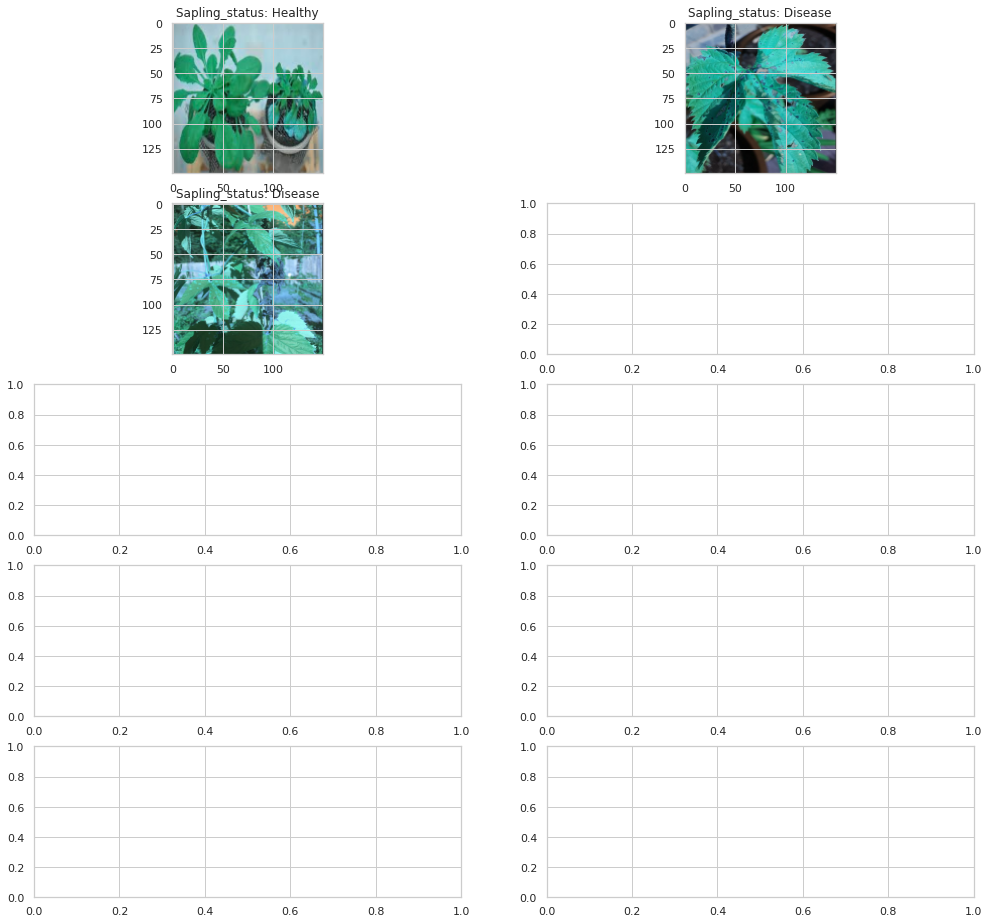

In [16]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Sapling_status: '+Z[l])
        
plt.tight_layout()

In [ ]:
##now we will encode labels for sapling classes

le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
np.random.seed(42)
rn.seed(42)

In [ ]:
model1 = Sequential()
model1.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model1.add(MaxPooling2D(pool_size=(2,2)))


model1.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model1.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model1.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dense(5, activation = "softmax"))

In [ ]:
batch_size=128
epochs=30

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
model1.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

model1.summary()

In [ ]:
History = model1.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

In [ ]:
loss = History.history['loss']
val_loss = History.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'mo', label='Training Loss')
plt.plot(epochs, val_loss, 'm', label='Validation Loss')
plt.title('Model1 Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [ ]:
acc = History.history['accuracy']
val_acc = History.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'go', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Model1 Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.show()